# Experiment 3.4



In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp3.5'

In [50]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [51]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp3.5_metrics.csv", index_col=0)

hpo_table["adamW"] = hpo_table["optim"].apply(lambda x: 1 if x == "adamW" else 0)
hpo_table["OneCycle"] = hpo_table["lradj"].apply(lambda x: 1 if x == "TST" else 0)
hpo_table.drop(columns=["optim", "lradj"], inplace=True)

In [52]:
hpo_table.sum(axis=0)

learning_rate        0.007200
batch_size        1536.000000
e_layers            48.000000
d_layers            24.000000
d_model          14336.000000
seq_len           2304.000000
pred_len          4608.000000
dropout              3.000000
weight_decay         1.320000
MSE                  2.368573
MAE                  5.234814
Epochs             237.000000
Time[min]          448.000000
Params[Mio.]       355.280000
Max_mem[MB]      25616.000000
adamW               24.000000
OneCycle            12.000000
dtype: float64

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

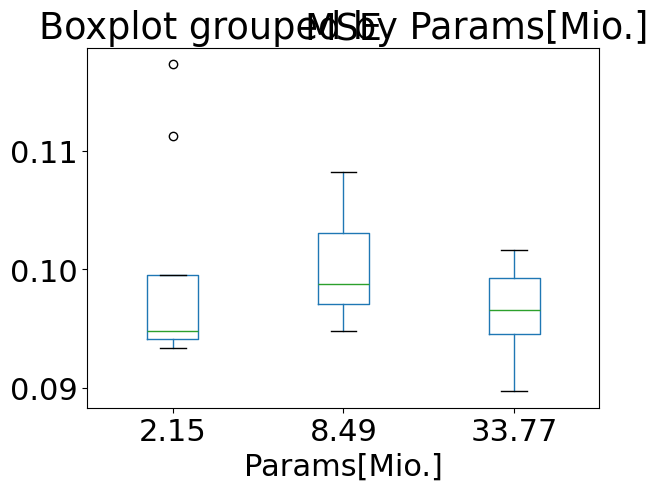

In [53]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

                       learning_rate  batch_size  d_layers  d_model  seq_len  \
e_layers Params[Mio.]                                                          
2        2.15                 0.0003        64.0       1.0    256.0     96.0   
         8.49                 0.0003        64.0       1.0    512.0     96.0   
         33.77                0.0003        64.0       1.0   1024.0     96.0   

                       pred_len  dropout  weight_decay       MSE       MAE  \
e_layers Params[Mio.]                                                        
2        2.15             192.0    0.125         0.055  0.099381  0.219079   
         8.49             192.0    0.125         0.055  0.100356  0.220416   
         33.77            192.0    0.125         0.055  0.096335  0.214857   

                       Epochs  Time[min]  Max_mem[MB]  adamW  OneCycle  
e_layers Params[Mio.]                                                   
2        2.15          12.000      7.875       424.33    1.0  

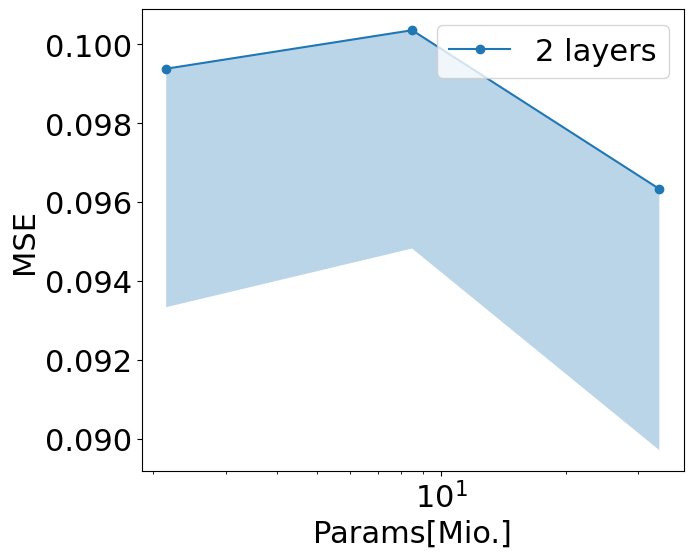

In [54]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==96].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==96].groupby(["e_layers", "Params[Mio.]"]).min()
print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(7, 6))
for i in [2]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers", marker="o")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend(loc="upper right")
ax.set_xscale("log")
# Move the x-axis to the top
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
plt.show()

In [55]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

,learning_rate,batch_size,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
e_layers,,,,,,,,,,,,,,,,


In [56]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
20,0.0005,64,2,1,1024,96,192,0.05,0.01,0.089719,0.205308,9,38,33.77,1916.37,1,1
21,0.0005,64,2,1,1024,96,192,0.20,0.10,0.090965,0.206029,10,42,33.77,1916.37,1,1
15,0.0005,64,2,1,256,96,192,0.20,0.10,0.093342,0.210589,15,10,2.15,424.33,1,0
1,0.0001,64,2,1,256,96,192,0.20,0.10,0.093606,0.211007,12,8,2.15,424.33,1,1
13,0.0005,64,2,1,256,96,192,0.20,0.10,0.094323,0.213429,8,5,2.15,424.33,1,1
12,0.0005,64,2,1,256,96,192,0.05,0.01,0.094614,0.213416,8,5,2.15,424.33,1,1
17,0.0005,64,2,1,512,96,192,0.20,0.10,0.094827,0.213986,7,10,8.49,861.30,1,1
14,0.0005,64,2,1,256,96,192,0.05,0.01,0.094977,0.215333,8,5,2.15,424.33,1,0
0,0.0001,64,2,1,256,96,192,0.05,0.01,0.095618,0.213117,15,10,2.15,424.33,1,1
11,0.0001,64,2,1,1024,96,192,0.20,0.10,0.095772,0.216296,8,31,33.77,1916.37,1,0


In [57]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(6)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models

,Lr,D. model,Enc. layers,OneCycle,Params[Mio.],Epochs,MSE,Seq. len.,adamW,dropout,weight_decay
Mean Top10,0.000380,512,2,0.70,12.27,10,0.093776,96,1.0,0.14,0.06
Std Top10,0.000193,362,0,0.48,14.96,2,0.001986,0,0.0,0.08,0.05
3,0.000100,256,2,0.00,2.15,15,0.117300,96,1.0,0.20,0.10
20,0.000500,1024,2,1.00,33.77,9,0.089719,96,1.0,0.05,0.01
21,0.000500,1024,2,1.00,33.77,10,0.090965,96,1.0,0.20,0.10
15,0.000500,256,2,0.00,2.15,15,0.093342,96,1.0,0.20,0.10


In [58]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0897193774580955

## Params[Mio.] vs MSE

In [59]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,dropout,weight_decay,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB],adamW,OneCycle
15,0.0005,64,2,1,256,96,192,0.20,0.10,0.093342,0.210589,15,10,2.15,424.33,1,0
1,0.0001,64,2,1,256,96,192,0.20,0.10,0.093606,0.211007,12,8,2.15,424.33,1,1
13,0.0005,64,2,1,256,96,192,0.20,0.10,0.094323,0.213429,8,5,2.15,424.33,1,1
12,0.0005,64,2,1,256,96,192,0.05,0.01,0.094614,0.213416,8,5,2.15,424.33,1,1
14,0.0005,64,2,1,256,96,192,0.05,0.01,0.094977,0.215333,8,5,2.15,424.33,1,0
0,0.0001,64,2,1,256,96,192,0.05,0.01,0.095618,0.213117,15,10,2.15,424.33,1,1
2,0.0001,64,2,1,256,96,192,0.05,0.01,0.111267,0.234860,15,10,2.15,424.33,1,0
3,0.0001,64,2,1,256,96,192,0.20,0.10,0.117300,0.240877,15,10,2.15,424.33,1,0
17,0.0005,64,2,1,512,96,192,0.20,0.10,0.094827,0.213986,7,10,8.49,861.30,1,1
19,0.0005,64,2,1,512,96,192,0.20,0.10,0.095834,0.214204,8,12,8.49,861.30,1,0


In [60]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model", "dropout", "weight_decay", "OneCycle"]]
print(reduced_hpo_table.shape)

(24, 10)


In [61]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(15, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.1  # add 5% padding below and above
    ymaxs += dys * 0.1
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00002
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00002, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="20%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


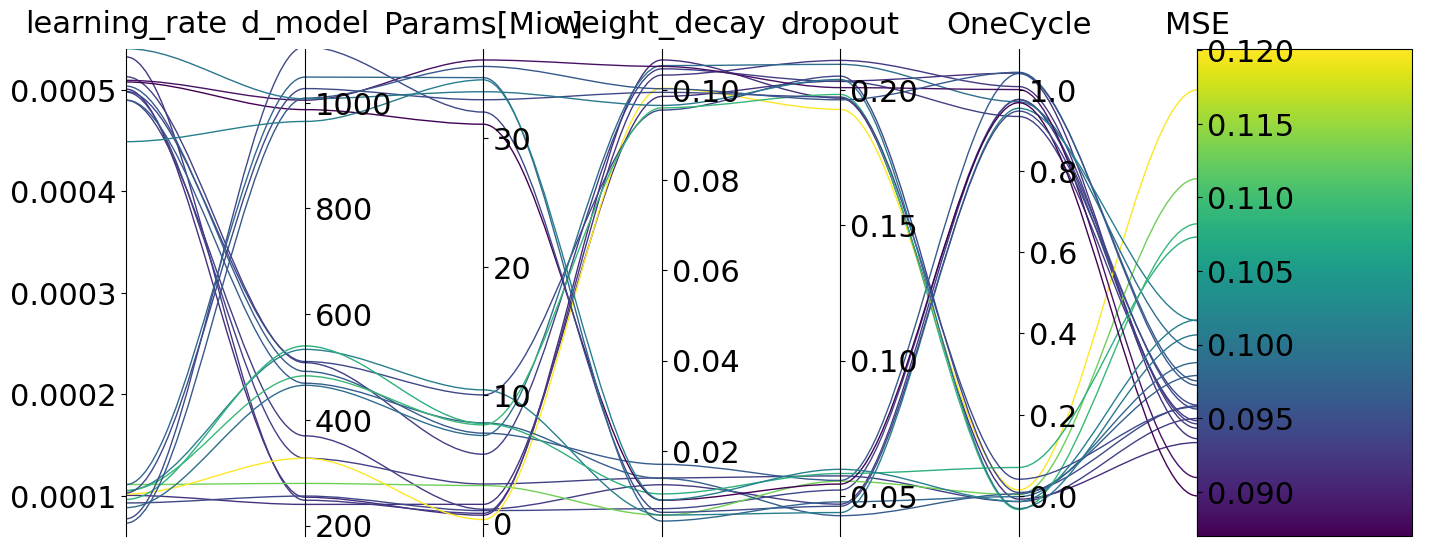

In [62]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "Params[Mio.]", "weight_decay", "dropout", "OneCycle", "MSE"])

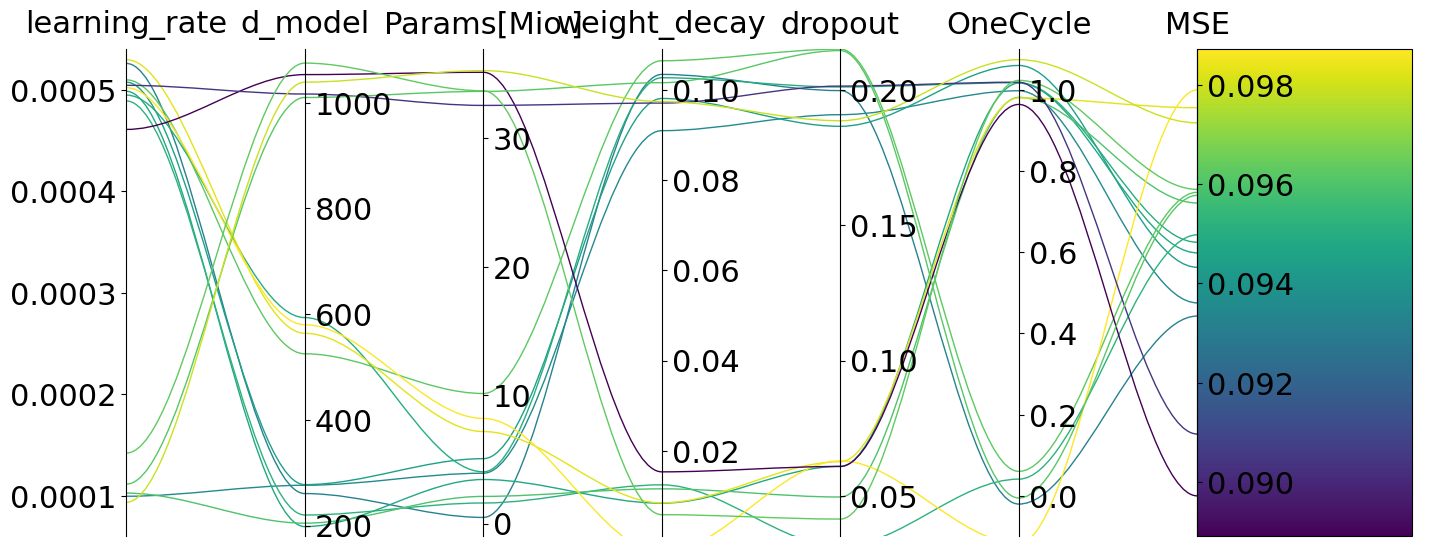

In [63]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "Params[Mio.]", "weight_decay", "dropout", "OneCycle", "MSE"], threshold=0.089719 * 1.1)

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_2755/2944249115.py:33: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_2755/2944249115.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


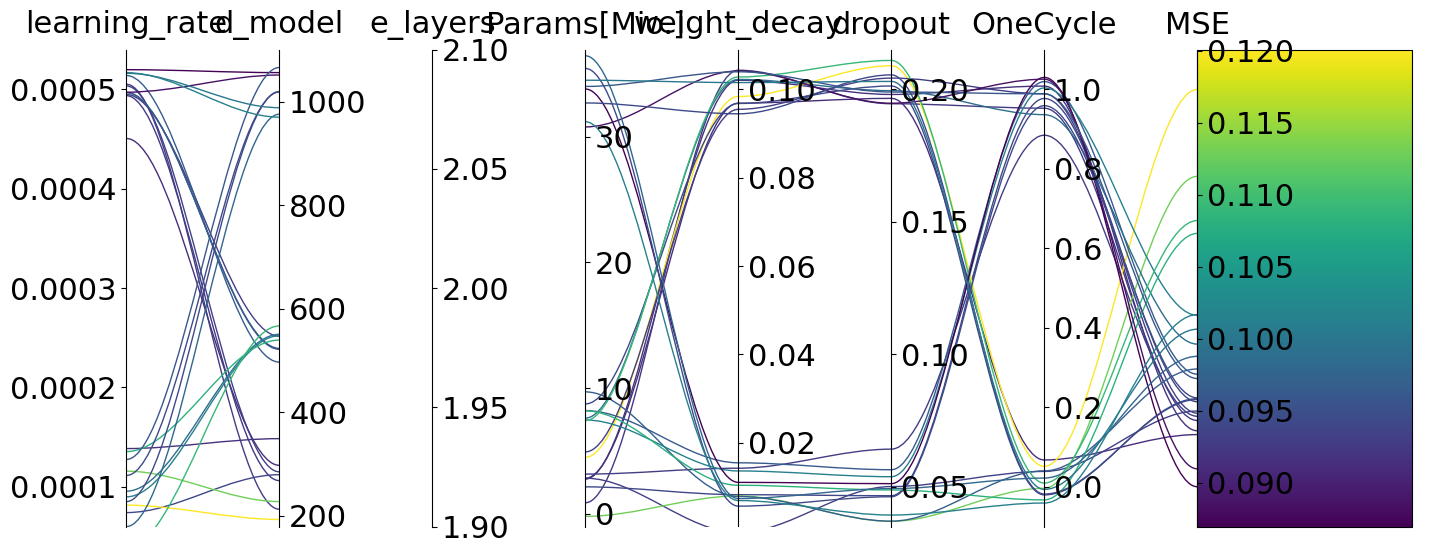

In [64]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "weight_decay", "dropout", "OneCycle", "MSE"], threshold=0.26)